In [2]:
from __future__ import print_function, division
from sympy import init_printing
from sympy.printing.codeprinter import CodePrinter
from sympy.printing.precedence import precedence
from sympy.printing.str import StrPrinter
from sympy import *
import ast
import numpy as np 
import matplotlib.pyplot as plt
init_printing()

### Load functional and parameters

In [16]:
data_file = '../HR_data/'
f=np.loadtxt(data_file+"parameter.dat")
L = float(f[0])
N = int(f[1])
dx = (L/N)
print(N,L,dx)
w_array=np.loadtxt("w_array.dat")

1024 32.0 0.03125


In [3]:
name = "free_energy_def.dat"
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)

In [4]:
name = "ML_parameter.dat" #load n_conv, con_dim,kill (killsmall)
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)
kill=float(kill)
print(n_parameter,conv_dim,n_conv,kill)

0 257 3 0.05


In [5]:
name = "assign_symbols_final.dat"
tmp = open(name, "r")
tmp=tmp.read()
tmp=tmp.replace("eps0","epsilon0")
tmp=tmp.replace("sepsilon0","seps0")

exec(tmp)

In [6]:
tmp

"sa1L0, sa1L1, sa1L10, sa1L11, sa1L12, sa1L13, sa1L14, sa1L15, sa1L16, sa1L17, sa1L18, sa1L19, sa1L2, sa1L20, sa1L21, sa1L22, sa1L23, sa1L24, sa1L25, sa1L26, sa1L27, sa1L28, sa1L29, sa1L3, sa1L30, sa1L31, sa1L32, sa1L4, sa1L5, sa1L6, sa1L7, sa1L8, sa1L9, sa2L10, sa2L11, sa2L12, sa2L13, sa2L17, sa2L18, sa2L19, sa2L20, sa2L21, sa2L22, sa2L23, sa2L24, sa2L25, sa2L26, sa2L27, sa2L28, sa2L29, sa2L3, sa2L30, sa2L31, sa2L32, sa2L33, sa2L34, sa2L35, sa2L36, sa2L37, sa2L38, sa2L39, sa2L4, sa2L40, sa2L41, sa2L42, sa2L43, sa2L44, sa2L45, sa2L46, sa2L47, sa2L48, sa2L49, sa2L5, sa2L50, sa2L51, sa2L52, sa2L53, sa2L54, sa2L55, sa2L56, sa2L57, sa2L58, sa2L59, sa2L6, sa2L60, sa2L61, sa2L62, sa2L63, sa2L64, sa2L65, sa2L66, sa2L67, sa2L68, sa2L69, sa2L70, sa2L71, sa2L72, sa2L73, sa2L74, sa2L75, sa2L76, sn0, sn1, sn2=symbols('a1L0, a1L1, a1L10, a1L11, a1L12, a1L13, a1L14, a1L15, a1L16, a1L17, a1L18, a1L19, a1L2, a1L20, a1L21, a1L22, a1L23, a1L24, a1L25, a1L26, a1L27, a1L28, a1L29, a1L3, a1L30, a1L31, a1L3

In [7]:
fed_eqn

<function __main__.fed_eqn()>

In [8]:
name = "fed_latex.dat"
tmp = open(name, "w")
tmp_string = str(latex(fed_eqn())).replace("epsilon_{0}","epsilon")
tmp.write(tmp_string)
tmp.close()
#tmp.write(str(latex(fed_eqn(syms))).replace("epsilon_{0}","epsilon"))

In [10]:

name = "all_parameter_2.dat"
tmp = open(name, "r")
tmp=tmp.read()
#print(tmp)
tmp=tmp.replace("/varible:0",":")
tmp=tmp.replace("/const_1:0",":")

for i in range(100):
    tmp=tmp.replace("_"+str(i),"")
tmp=tmp.replace("[[","")
tmp=tmp.replace("]]","")
tmp=tmp.replace("\n",",")
tmp=tmp.replace(":","\":")
tmp=tmp.replace(",",",\"")
tmp="{\""+tmp+"}"
tmp=tmp.replace(",\"}","}")
#print(tmp)
dict_all=ast.literal_eval(tmp)

In [11]:
for i in list(dict_all.keys()):
    if(np.abs(dict_all[i])<kill):
        dict_all[i]=0
    #dict_all[i]=np.round(dict_all[i],1)

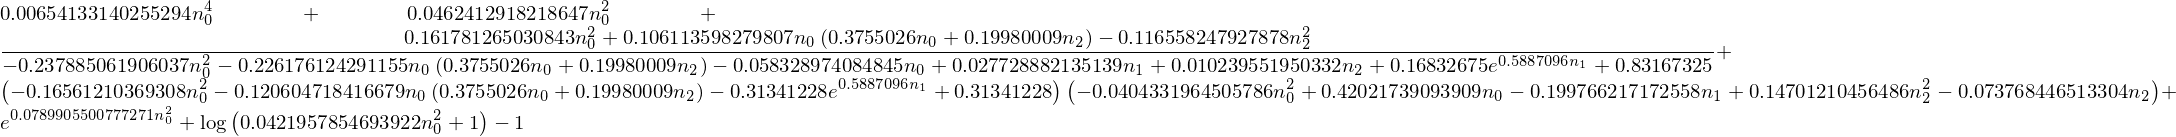

In [12]:
fed_eqn().subs(dict_all)

In [13]:
### latex output

In [14]:
name = "fed_latex_number.dat"
tmp = open(name, "w")
tmp_string = str(latex(fed_eqn().subs(dict_all))).replace("epsilon_{0}","epsilon")
tmp.write(tmp_string)
tmp.close()

In [18]:
srho=symbols('rho') 
f=fed_eqn()
#f=f.subs({sn0:np.sum(w_array[0])*dx*srho})
#f=f.subs({sn1:np.sum(w_array[1])*dx*srho})
#f=f.subs({sn2:np.sum(w_array[2])*dx*srho})
#f=f.subs({sn3:np.sum(w_array[3])*dx*srho})
f=f.subs(dict_all)

### for displaying purpose, the coefficients are rounded to the first decimal place oder the first non-zero digits

In [19]:
def non_zeros(a):
    a=float(a)
    power=np.floor(np.log10(np.abs(a)))
    coeff = np.round(np.abs(a)/10**power)
    sign = np.round(a/np.abs(a))
    return sign*coeff*10**(power)

In [20]:
print(non_zeros(0.55),non_zeros(-0.044),non_zeros(-0.068))

0.6000000000000001 -0.04 -0.07


In [21]:
f2=f
for a in preorder_traversal(f):
    if isinstance(a, Float):
        f2 = f2.subs(a, non_zeros(a))

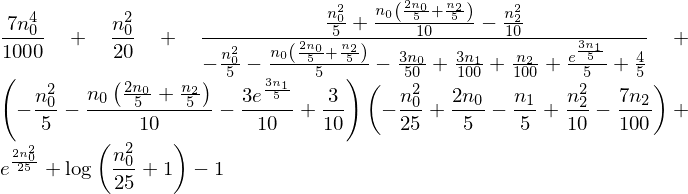

In [24]:
nsimplify(f2, tolerance=1e-4)

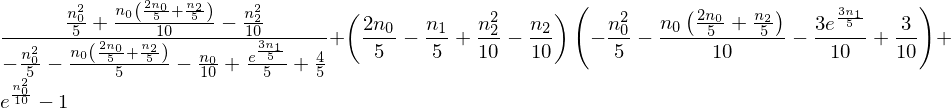

In [26]:
f2=f
for a in preorder_traversal(f):
    if isinstance(a, Float):
        f2 = f2.subs(a, np.round(float(a),1))
nsimplify(f2, tolerance=1e-4)

In [29]:
name = "fed_latex_number.dat"
tmp = open(name, "w")
tmp_string = str(latex(f2)).replace("epsilon_{0}","epsilon")
tmp.write(tmp_string)
tmp.close()

### equation of state (here, pressure versus density)

In [52]:
srho=symbols('rho') 
f=fed_eqn()
f=f.subs({sn0:np.sum(w_array[0])*dx*srho})
f=f.subs({sn1:np.sum(w_array[1])*dx*srho})
f=f.subs({sn2:np.sum(w_array[2])*dx*srho})
#f=f.subs({sn3:np.sum(w_array[3])*dx*srho})
f=f.subs(dict_all)


In [53]:
P=series(-f+diff(f,srho)*srho,n=10)
P2=P
for a in preorder_traversal(P):
    if isinstance(a, Float):
        P2 = P2.subs(a, round(a, 3))
latex(P2)

'1.026 \\rho^{2} + 0.71 \\rho^{3} + 1.943 \\rho^{4} - 0.382 \\rho^{5} + 2.375 \\rho^{6} - 0.783 \\rho^{7} + 3.075 \\rho^{8} - 1.272 \\rho^{9} + O\\left(\\rho^{10}\\right)'

In [72]:
def PML():
    P=(-f+diff(f,srho)*srho+srho)
    rho0_array = np.linspace(0.1,0.9,50)
    P_array = np.zeros(len(rho0_array))
    for i in range (len(rho0_array)):
        rho0=rho0_array[i]
        P_array[i]+=P.subs('rho',rho0)
    return P_array,rho0_array    

## be careful
def virial_test(n):
    
    P=series(-f+diff(f,srho)*srho+srho,n=n)
    coeff_array=poly(P.removeO(),srho).all_coeffs()
    rho0_array = np.linspace(0.1,0.9,50)
    P_array = np.zeros(len(rho0_array))
    for i in range (len(rho0_array)):
        rho0=rho0_array[i]
        for j in range (n):
            P_array[i]+=coeff_array[j]*rho0**(n-j-1)
    return P_array,rho0_array

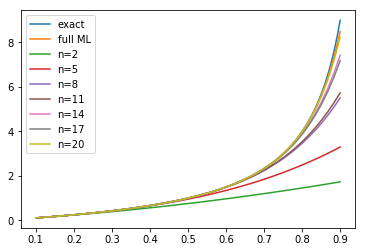

In [74]:
rho = np.linspace(0.1,0.9,500)
plt.plot(rho,rho/(1-rho),label="exact")
plt.plot(PML()[1],PML()[0],label="full ML")

for n in range (3,24,3):
    P,rho=virial_test(n)
    plt.plot(rho,P,label="n="+str(n-1)) #start with zero
plt.legend()